# (6) Practical guide toward artificial neural networks for regression

## introduction to machine learning for materials science

The rise of artificial neural networks is driven by their extraordinary versatility. They can classify data, but unlike the previously discussed perceptron with non-linear decision boundaries and on data, which is not clearly 'spatially' separated. They can be used for image recognition when adequately modified, used for extrapolation of time series, and a lot more. Some of these approaches might be covered in the future. 
Here, we will focus on perceptrons for (non-linear) regression, i.e. for interpolation, as this is what we have seen so far in certain depth, and because it offers an intuitive approach towards neural networks.
We will use the [*Keras*](https://keras.io/) library will be used for this, which works on top of Google's [*TensorFlow*](https://www.tensorflow.org/) platform. Using *Keras* it is easy to set up neural networks for different tasks as much of the underlying code is optimized and is running under the hood. We thus do not have to worry much about the implementation and can build designer networks specific to the required task. This is like using the **Perceptron** function implemented in *scikit-learn* instead of our self-written perceptron code. 

As we have seen previously, the original perceptron consists of one input layer, one so-called hidden layer, and one output layer. This allows for linear regression and classfication of linearly separable data points. We also used the perceptrons with more than one neuron in the hidden layer for classification of the XOR-gate, for which two linear decision boundaries are required. Similarly, we can construct a neural network with more than one hidden neuron for fitting non-linear function.

For example, the function *abs()*, which returns the absolute value of the argument, cannot be fitted by one single linear line. Two fitting regions are required and neural networks can find these automatically. First, we define the required function and then define a neural network using the multilayer perceptron from *scikit-learn*, and then the same using *Keras*.

In [1]:
#importing relevant libraries
import numpy as np
from sklearn.neural_network import MLPRegressor

#setting some parameters
a = 0

#defining the absol() functions to be fitted
def absol(x):
    y = np.abs(x)+a
    return y


#some data points in which the functions operate
X = np.arange(-10,10,0.3).reshape(-1,1)
y = absol(X)

#defining the model using the MLPRegressor perceptron from scikit-learn
#for fitting the abssol()
mlp_absol = MLPRegressor(hidden_layer_sizes=(2,), activation='relu', solver='lbfgs', max_iter=1000)

#using the above defined model for fitting the absol() function
model_absol = mlp_absol.fit(X, np.ravel(y))

Now that the the fit is done, we can compare the original function absol() (blue line) to the fitted datapoints (orange).
If instead of 2 neurons only 1 is used in the hidden layer by setting `hidden_layer_sizes=(1,)`, the fit does not work. Try it out by modifying the above cell.

There are other parameters to be set like the activation function, the solver, and the maximum number of iterations (learning cycles). The fit will depend on these parameters and changing them will change how fast, or if at all, the fit returns useful results.

One of the two neurons in the hidden layer is trained to fit one branch of the abs() function, one for the positive values, one for the negative values. It's a good excercise to figure out why this is so by looking at the weights and bias terms. One key element you need to understand is what the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function is doing.

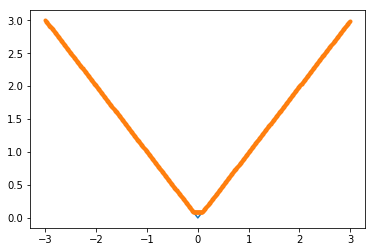

[array([[-1.58434945,  1.78315803]]), array([[0.63118012],
       [0.56080944]])]
[array([-0.1373037 , -0.15450884]), array([0.08660565])]


In [9]:
import matplotlib.pyplot as plt

#plotting the absol() function in the aboves pecified data range as a blue line
plt.plot(X, absol(X))
#plotting the predicted values (fit) from the modle as orange dots
plt.plot(X, model_absol.predict(X), 'o', markersize=3)

plt.show()

#printing the weights and the bias terms of the opitimzed model
print(model_absol.coefs_)
print(model_absol.intercepts_)

Some notes on how the neural networks here learn and what is happening in the background. Skip this part and jump to the **Neural networks with *Keras*** section if you are not interested at the moment in the *how* it works but still want to set up a neural network.

### Forward propagation

The networks we use are called feed-forward propagating networks because the input from the input layer is fed forward to the first hidden layer by calculating the weighted sum, then the activation function is applied, and the output of the hidden layer is again fed forward to the output layer, again as weighted sum. Alternatively, if more than one hidden layer is present, the input propagates through the network from input layer, to first hidden layer, to second hidden layer, etc, until the output layer. Tensors are used to encode the input data and for all subsequent calculations of the weighted sums, activation functions, etc.
See [here](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html) and [here](https://en.wikipedia.org/wiki/Feedforward_neural_network) for more information on forward propagating neural networks.

### Loss function

Somehow we need criteria to judge how well the model (fit) is mimicking our data. This is commonly called the loss function. For linear regression, we can use the mean squared error $\sum_i (y_i-\hat{y}_i)^2$, where $y_i$ is the expected value (the provided data point), and $\hat{y}_i$ the predicted value by the model. For a good fit, mean squared error should be as small as possible, minimizing the differences between expected and predicted values. Thus, the loss function needs to be minimized. Ideally, we can find the minimum in the loss function, which corresponds to a point with zero gradient. Several loss functions can be used, see [here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) and [here](https://en.wikipedia.org/wiki/Loss_function). 

### Backward propagation

In order to minimize the loss function, the weights and bias terms in the neural network need to be adjusted. This is achieved by backward propagation and trains the network. In other words, the neural network 'learns' the weights and bias terms that minimize the loss function. The way the network's parameters are updated depends on the chosen optimizer. What the optimizers often have in common is that the error (the value of the loss function) is propagated from the output layer back to towards the input layer. Since we want to minimize the loss and find the point of zero gradient, we adjust the parameters by a term proportional to the (negative) gradient of the loss function ([gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)). Since the output is a function of all the weights and bias terms (fed through the activation functions), the chain rule is used to find the corresponding way a given weight needs to be updated. More on optimizers [here](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6).
See [here](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html) and [here](https://en.wikipedia.org/wiki/Backpropagation) for more information on backpropagation.

### Activation function

The activation function plays a decisive role in learning the network's parameters. Not all activation functions are suitable for a given task. We have used the sigmoid function previously, other typical functions are the ReLU function and the hyperbolic tangent.
More info [here](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) and [here](https://en.wikipedia.org/wiki/Activation_function)

Each of these certainly need a more extensive treatment to make them justice. But there is plenty information out there on the internet to read up on them and for now we will forgo a more detailed account.

What needs to be remembered that different activation functions, loss functions, and optimizers yield different results. Although some are obvious choices, depending on what one wants to achieve, testing these to find a suitable model is at the heart of using neural networks.

### Neural networks with *Keras*

Setting up a neural network with any number of hidden layers and neurons is straigt forward. The [**Sequential**](https://keras.io/models/sequential/) model needs to be imported, which is used to build the fully connected network structure, i.e. the output of each neuron in one layer is the input to all neurons of the following layer. This is achieved with the [**Dense**](https://keras.io/layers/core/#dense) keyword. The [**Activation**](https://keras.io/activations/) library loads implemented activation functions. Loss functions can be found [here](https://keras.io/losses/).

With this we can build the above specified one layer perceptron as follows.

In [3]:
#importing keras and relevant libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation

#specifying the number of neurons in the hidden layer
n_neurons = 2

#create a sequential model (with name 'model'), in which the output of one layer is the input of the following layer
model = Sequential()

#add one dense layer to the model, this is the hidden layer. 
#here, the input and output dimension (units, as in neurons in the layer) needs to be specified.
#the input layer is implicit and does not need to be explicitly specified.
#the input dimension is one, since our input x as argument of the abs() funciton is one dimensional.
#the output dimension (units) is 2 (n_neurons specified above). This sets the number of neurons in this layer.
model.add(Dense(units=n_neurons, input_dim=1))
#for this layer we set the activation function to ReLU
model.add(Activation("relu"))

#add one more layer, the output layer. the input dimension is implicit 
#and takes the value of units of the previous layer.
#specify one neuron, the y=f(x)=abs(x)
model.add(Dense(units=1))

#compile the model with a loss function (mean_squared_error) and an optimizer (sge)
model.compile(loss='mean_squared_error', optimizer='sgd')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


The above cell specifies the network topology, i.e. how many layers, how many neurons, and connectivity.
The following cell trains the network to find a fit for the abs() function. Turns out this is rather tricky and only a few training runs find a suitable fit.

In [4]:
#train the model using the fit() function.
#the number of learning cycles is set using epochs
#verbose=1 prints the updated loss function after each training cycle

res = model.fit(X, y, epochs=1000, verbose=0)

Instructions for updating:
Use tf.cast instead.


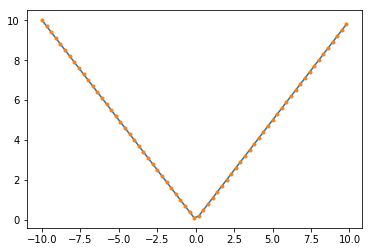

In [5]:
plt.plot(X, absol(X))
plt.plot(X, model.predict(X), 'o', markersize=3)

plt.show()

Fitting the abs() function works (sometimes) with two neurons. But also much more complex functions can be fitted with neural networks. In fact, according to the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), a sufficiently large neural network can approximate any continuous function. Artificial neural networks are thus suitable for data interpolation, even if the arithmetic function underlying the data points is unknown. 

We can test this on any arbitrary function.

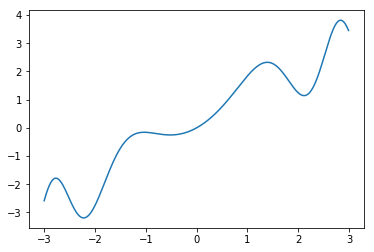

In [6]:
#defining some function
def arb_function(x):
    y = np.sin(x**2)+x
    return y

#setting the interval of X and compute y
X = np.arange(-3.,3,0.01).reshape(-1,1)
y = arb_function(X)

#plotting the function
plt.plot(X, arb_function(X))

plt.show()

This function is sufficiently complex that two neurons will not do the job of yielding a nice fit. Indeed, even a single hidden layer with 1000 neurons does not do a great job.

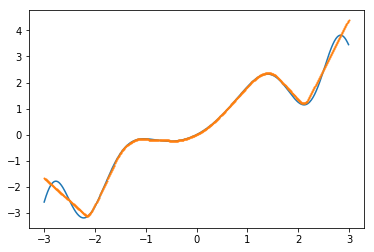

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              2000      
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
#setting number of neurons in the hidden layer
n_neurons = 1000

#building the model with one hidden layer and ReLU activation function
#1 input and 1 output neuron.
model_1 = Sequential()
model_1.add(Dense(units=n_neurons, input_dim=1))
model_1.add(Activation("relu"))
model_1.add(Dense(units=1))
model_1.compile(loss='mean_squared_error', optimizer='adam')

#training the network with 1000 learning cycles
res_1 = model_1.fit(X, y, epochs=1000, verbose=0)

#plotting the original function (blue line) and the predicted data (orange dots)
plt.plot(X, arb_function(X))
plt.plot(X, model_1.predict(X), 'o', markersize=1)

plt.show()

#this prints a summary of the network, i.e. number of layers, neurons and parameters (weights, bias)
model_1.summary()

The previous network has 1000 neurons in the hidden layer, clearly not sufficient to nicely fit the function at its ends. A two-layer network with only 100 neurons each performs much better.

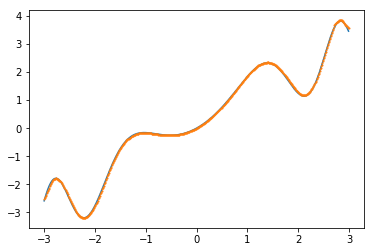

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               200       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [8]:
n_neurons = 100
model_2 = Sequential()
model_2.add(Dense(units=n_neurons, input_dim=1))
model_2.add(Activation("relu"))
model_2.add(Dense(units=n_neurons))
model_2.add(Activation("relu"))
model_2.add(Dense(units=1))
model_2.compile(loss='mean_squared_error', optimizer='adam')

res_2 = model_2.fit(X, y, epochs=1000, verbose=0)

plt.plot(X, arb_function(X))
plt.plot(X, model_2.predict(X), 'o', markersize=1)

plt.show()

model_2.summary()

Although the number of neurons is only one-fifth in the 2-layer network compared to the single-layer network, the fit looks visually much nicer. Comparing the model summaries tells us why this is so: the number of adjustable parameters (weights and bias terms) is three times larger in the two-layer network due to the many connections between the two hidden layers. And as John von Neumann appears to have [said](https://en.wikiquote.org/wiki/John_von_Neumann) '*With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.*' This, in consequence, means that overfitting can become a serious problem in using machine learning algorithms, in particular large neural networks.